In [ ]:
from google.colab import drive
drive. mount('/drive',force_remount = True)

Mounted at /drive


#Quantitative Analysis
##### **Research Question**: Is there a significant difference in the occupancy room rates between the 'Men' and 'Women' sectors in shelter programs?
##### **Hypothesis**
###### H0: μMen​=μWomenen​  
*There is no significant difference in the mean room occupancy rates between the 'Men' and 'Women' sectors.*
###### Ha: μMen is not euqal to μWomen​.
*There is a significant difference in the mean romm occupancy rates between the 'Men' and 'Women'  sectors*


In [ ]:
# Import the dataset
import pandas as pd                                          #import the necessary library
from scipy.stats import ttest_ind                             #import the necessary library
df = pd.read_csv('/drive/MyDrive/INF1340/Sources/INF2178_A1_data.csv') # import the dataset (I have converted the xlsx file into csv file which makes it easier for analysis)
df.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [ ]:
# Calculate the continuous variable (occupancy room rate)
df['OCCUPANCY_RATE'] = df['OCCUPIED_ROOMS'] / df['CAPACITY_ACTUAL_ROOM'] # Add a column room occupancy rate
df.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0,0.956522
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0,0.956522
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0,1.000000
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0,0.975610


In [ ]:
# Remove the missing values (I focused on the two variable continuous variable: room occupancy rate and categorical variable: sector)
df_cleaned = df.dropna(subset=['OCCUPANCY_RATE', 'SECTOR'])
df_cleaned.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,0.896552
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,1.000000
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,1.000000
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571


In [ ]:
# Select the categorical variable for analysis (sector: Men and Sector Women)
Selected_Sector = ['Men', 'Women']  #Select men and women to conduct the t test
df_selected = df_cleaned[df_cleaned['SECTOR'].isin(Selected_Sector)]
df_selected.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,0.821429
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,0.928571
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0,0.975610
14,2021-01-01,City of Toronto,13671,Birkdale North York West Hotel Program Single ...,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,5,Room Based Capacity,NaN,NaN,5.0,5.0,1.000000
23,2021-01-01,City of Toronto,16031,Scarborough Women's Shelter Response Program,Women,Emergency,Shelter,COVID-19 Response,66,Room Based Capacity,NaN,NaN,65.0,65.0,1.000000


In [ ]:
# select the room occupancy rate where the sector is either Men or Women
occupancy_men = df_selected[df_selected['SECTOR'] == 'Men']['OCCUPANCY_RATE']
occupancy_women = df_selected[df_selected['SECTOR'] == 'Women']['OCCUPANCY_RATE']

# Perform the independent t-test
t_stat, p_value = ttest_ind(occupancy_men, occupancy_women, equal_var=False)

# Display the t-test results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 13.729207701163253
P-value: 2.3324018592726617e-41


######**Conclusion**: I decided to reject the null hypothesis since the p-value is extremenly low (much lower than the 0.05). There is a statistically significant difference between means of the occupancy rate of the groups (Men and Women) at 5% significant level.  

# Exploratory Data Analsis

In [ ]:
#Load the data (I have converted into csv file which eaiser for analysis)
import pandas as pd
import matplotlib.pyplot as plt                   #import the necessary library
import seaborn as sns                            #import the necessary library
df2 = pd.read_csv('/drive/MyDrive/INF1340/Sources/INF2178_A1_data.csv') # import the dataset (I have converted the xlsx file into csv file which makes it easier for analysis)
df2.head(10)


###### Continuous variable analysis (room occupancy rate and bed occupancy rate)

In [ ]:
# Summary Statistics of room occupancy rate and bed occupancy rate
df2['Room_OCCUPANCY_RATE'] = df2['OCCUPIED_ROOMS'] / df2['CAPACITY_ACTUAL_ROOM'] # add column room occupancy rate
df2['Bed_OCCUPANCY_RATE'] = df2['OCCUPIED_BEDS'] / df2['CAPACITY_ACTUAL_BED']    # add column bed occupancy rate
summary_stats = df2[['Room_OCCUPANCY_RATE', 'Bed_OCCUPANCY_RATE']].describe()
print(summary_stats)


       Room_OCCUPANCY_RATE  Bed_OCCUPANCY_RATE
count         18545.000000        32399.000000
mean              0.934087            0.927885
std               0.163241            0.122562
min               0.012048            0.022727
25%               0.958333            0.900000
50%               1.000000            1.000000
75%               1.000000            1.000000
max               1.014085            1.000000


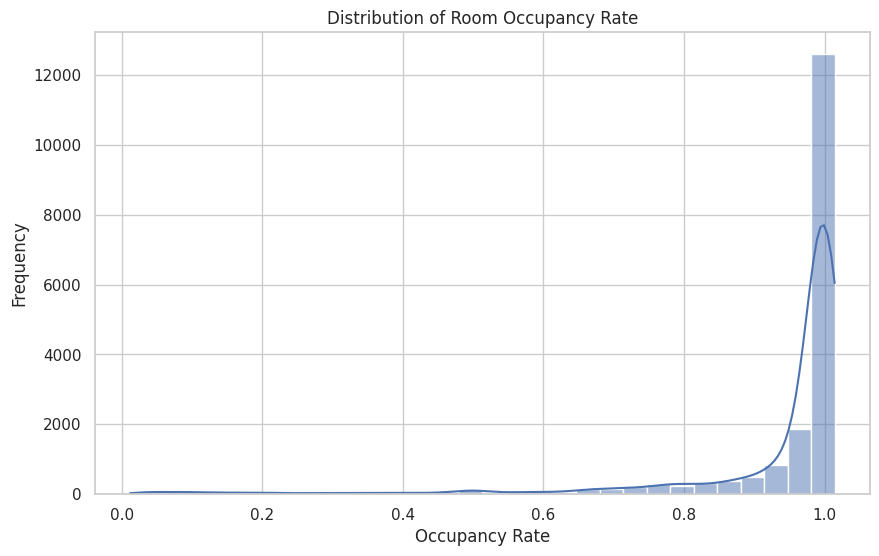

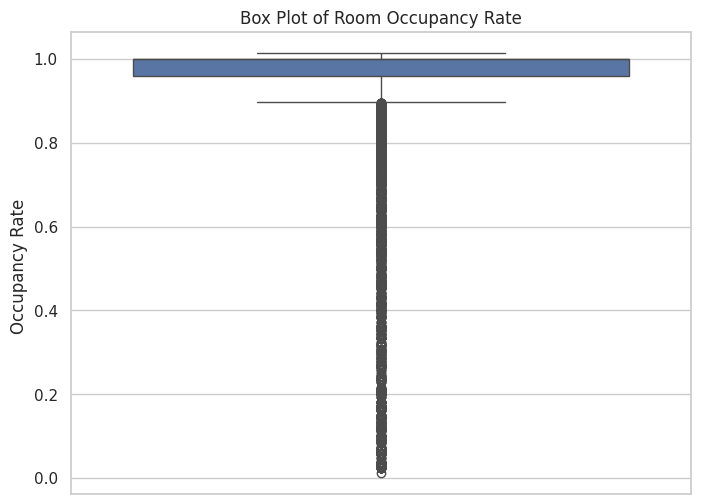

In [ ]:
# Visualization
#Histogram for the Room occupancy rate
plt.figure(figsize=(10, 6))
sns.histplot(df2['Room_OCCUPANCY_RATE'].dropna(), bins=30, kde=True)
plt.title('Distribution of Room Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

#Boxplot for the Room occupancy rate
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['Room_OCCUPANCY_RATE'])
plt.title('Box Plot of Room Occupancy Rate')
plt.ylabel('Occupancy Rate ')
plt.show()

**Summary statistics:** There are 18545 observations. On average, rooms are 93.4% occupied. standard deviation of 0.163 shows that there are some variability. The minimum room occupancy rate is 1.2%. The maximum occupancy rate is 101.4%. There are some rooms are underutilized. Over 100% occupancy rate is possibly because of the overbooking or errors. The median is around 100%.

**Histogram:** the distribution of room occupancy rate is left-skewed. Most of the data is around 1.0. High occupancy rate is very common but there are still few low occupancies rate.  Mode > Median > Mean shows that lower values pull the mean down more than they affect the median or mode.

**Boxplot:** The room occupancy rate is concentrated on the high end. This means that the high occupancy rate is very common. The above 1.0 is the outlier. Some outliers below the lower end bound.




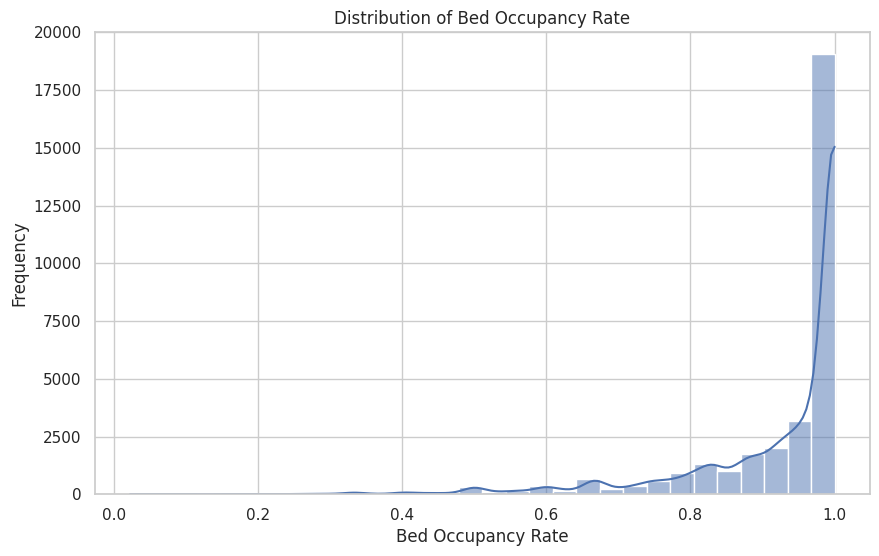

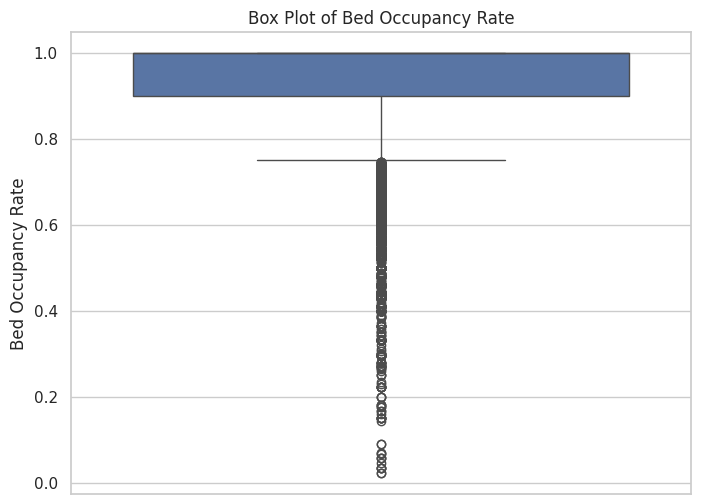

In [ ]:
#Histogram for the Bed occupancy rate
plt.figure(figsize=(10, 6))
sns.histplot(df2['Bed_OCCUPANCY_RATE'].dropna(), bins=30, kde=True)
plt.title('Distribution of Bed Occupancy Rate')
plt.xlabel('Bed Occupancy Rate')
plt.ylabel('Frequency')
plt.show()

#Boxplot for the Bed occupancy rate
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['Bed_OCCUPANCY_RATE'])
plt.title('Box Plot of Bed Occupancy Rate')
plt.ylabel('Bed Occupancy Rate')
plt.show()

**Summary Statistics:** There are 32399 observations. On average, beds are 92.8% occupied. standard deviation of 0.123 shows that there are some variabilities.  The minimum room occupancy rate is 2.3%. The maximum occupancy rate is 100%. There are some rooms are underutilized. There is no case that the used bed is higher than the available beds. The median is around 100%.

**Histogram:** the distribution of room occupancy rate is left-skewed. Most of the data is around 1.0. High occupancy rate is very common but there are still few low occupancies rate.

**Boxplot:** The room occupancy rate is concentrated on the high end. This means that the high occupancy rate is very common. The outlier is on the lower end of the scale.


###### Categorical variable analysis (Sector and Capacity type)

In [ ]:
# Frequency Count
# Categorical variable SECTOR
sector_counts = df2['SECTOR'].value_counts()
print("Frequency Counts for SECTOR:")
print(sector_counts)
print("\n")
# Categorical variable Capacity type
capacity_counts = df2['CAPACITY_TYPE'].value_counts()
print("Frequency Counts for Capacity type:")
print(capacity_counts)
print("\n")

Frequency Counts for SECTOR:
Mixed Adult    15533
Men            12241
Women           9258
Youth           8263
Families        5649
Name: SECTOR, dtype: int64


Frequency Counts for Capacity type:
Bed Based Capacity     32399
Room Based Capacity    18545
Name: CAPACITY_TYPE, dtype: int64




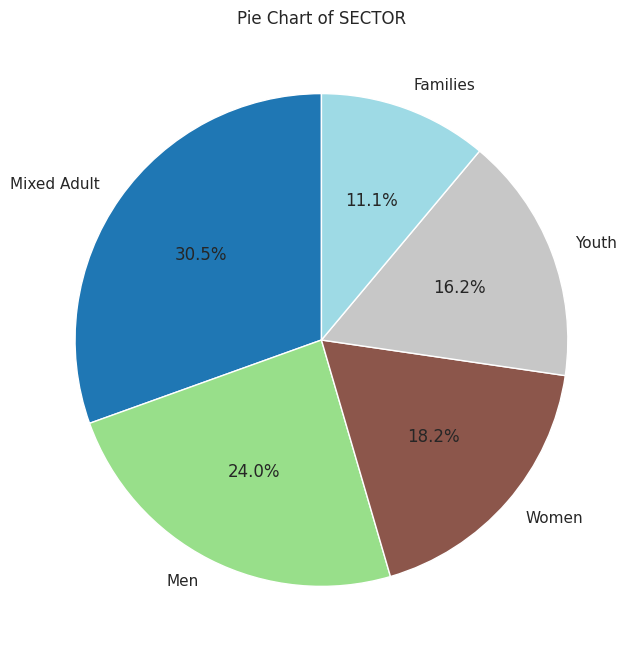

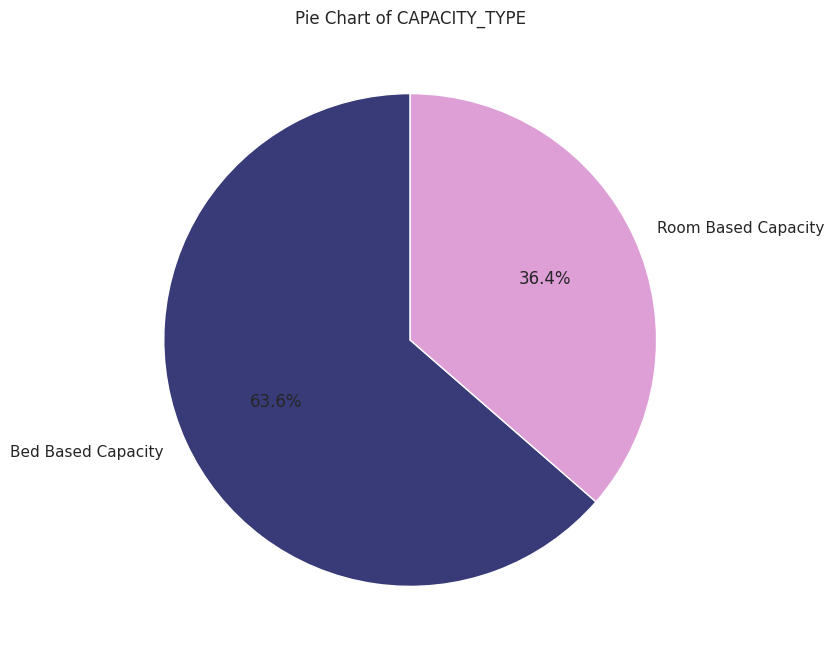

In [ ]:
# Visualization: Pie chart
# Sector pie chart
plt.figure(figsize=(8, 8))
sector_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.title('Pie Chart of SECTOR')
plt.ylabel('')  # Hide the y-label as it's not needed for a pie chart
plt.show()

# Capacity type Pie chart
plt.figure(figsize=(8, 8))
capacity_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20b')
plt.title('Pie Chart of CAPACITY_TYPE')
plt.ylabel('')  # Hide the y-label for the same reason
plt.show()

**Findings (sector):** There are 5 sector types of homeless including Mixed adult, men, women, youth, families. The mixed adult is the most common sector type with 30.5%. There is a huge shelter service demand for the adults. The proportion of men and women are very close (men: 24%, women: 18.2%). The relatively close proportions suggest a balanced approach to addressing the needs of both genders, though programs for men are slightly more prevalent. The Families sector takes 11.1% of the observations, the smallest among the categories analyzed. It shows that while there is support for families, the focus or availability of dedicated family services is less compared to services aimed at individuals or gender-specific groups.

**Findings(Capacity_type):** There are two types of capcacity including the bed based capacity and room based capacity. Bed based capacity takes the higher proportion than the room based capacity. Bed based capacity is more common than the room based capacity. It means that a majority of the programs are designed to maximize the use of space and accommodate as many individuals as possible in shared sleeping arrangements.


###### Explore relationships

        SECTOR  Room_OCCUPANCY_RATE
1          Men             0.996345
3        Women             0.969882
4        Youth             0.945445
0     Families             0.930657
2  Mixed Adult             0.899828


<ipython-input-66-2e41ede89c22>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room_OCCUPANCY_RATE', y='SECTOR', data=sector_room_occupancy_sorted, palette='coolwarm')


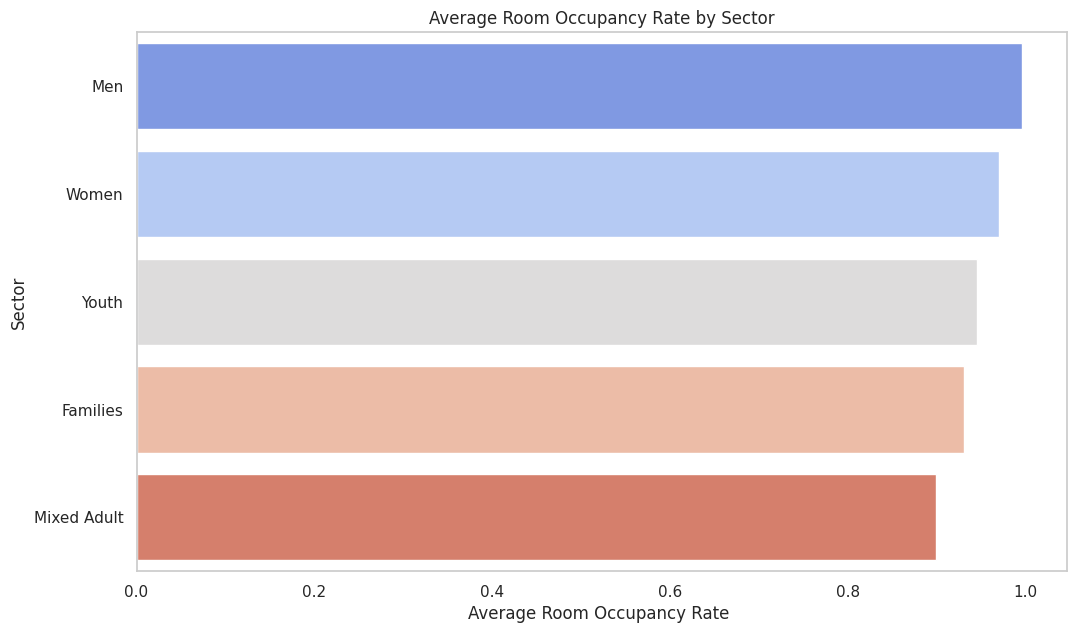

In [ ]:
# Explore the relationship between capacity rate and the sector type
# Room capacity rate and sectore type
sector_room_occupancy = df2.groupby('SECTOR')['Room_OCCUPANCY_RATE'].mean().reset_index()
sector_room_occupancy_sorted = sector_room_occupancy.sort_values(by='Room_OCCUPANCY_RATE', ascending=False)# Sorting the sectors by room occupancy rate
#Table of room capacity rate by sector
print(sector_room_occupancy_sorted)
# Visualization: bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Room_OCCUPANCY_RATE', y='SECTOR', data=sector_room_occupancy_sorted, palette='coolwarm')
plt.title('Average Room Occupancy Rate by Sector')
plt.xlabel('Average Room Occupancy Rate ')
plt.ylabel('Sector')
plt.grid(axis='x')
plt.show()

**Findings:** For the room occupancy rate, the men have the highest room occupancy rate of (99.6%). This suggests that programs designed for men are operating very close to their full room capacity, indicating high demand or efficient management of resources within this demographic. The room occupancy rate in the female sector is 96.9%, which is slightly lower than in the male sector, but still shows a high utilisation rate. This reflects a strong demand for female-specific programmes, but also shows that these services are also close to saturation. The Families sector has the lowest room occupancy rate at 89.98%. This shows that underutilization of bed-based capacities in family-specific programs.

**Further Analysis:** In order to provide more efficient service for the homeless, we could explore more about the reasons why the family has the lowest room capacity rate.


        SECTOR  Bed_OCCUPANCY_RATE
1          Men            0.960008
3        Women            0.939212
2  Mixed Adult            0.920749
4        Youth            0.880683
0     Families            0.788377


<ipython-input-67-834246277f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bed_OCCUPANCY_RATE', y='SECTOR', data=sector_bed_occupancy_sorted, palette='coolwarm')


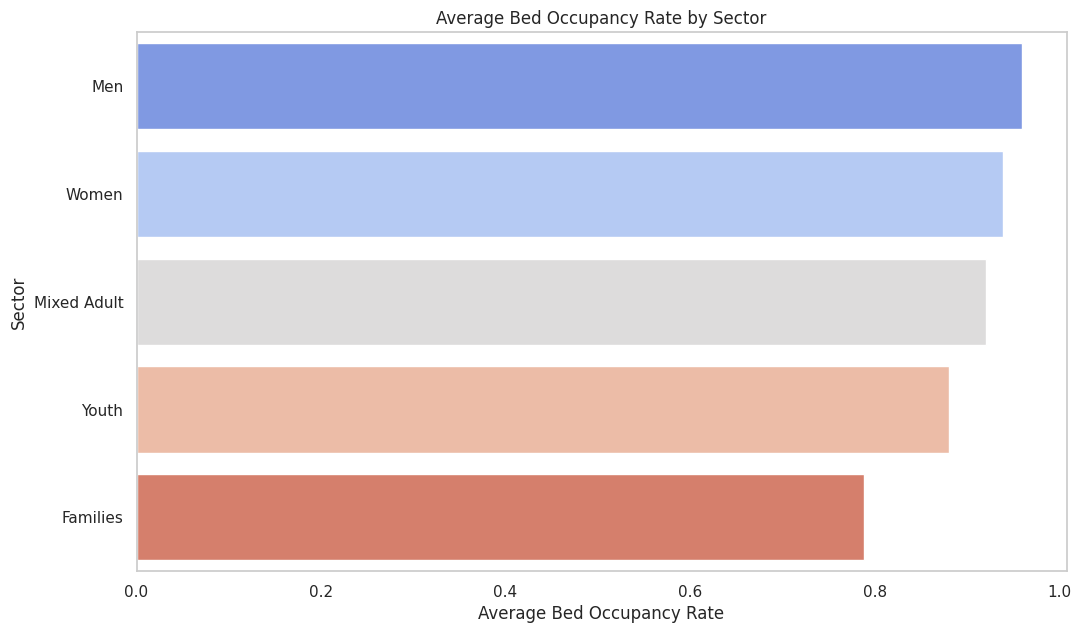

In [ ]:
# Bed capacity rate and sectore type
sector_bed_occupancy = df2.groupby('SECTOR')['Bed_OCCUPANCY_RATE'].mean().reset_index()

# Sorting the sectors by bed occupancy rate for better visualization
sector_bed_occupancy_sorted = sector_bed_occupancy.sort_values(by='Bed_OCCUPANCY_RATE', ascending=False)

#Table of room capacity rate by sector
print(sector_bed_occupancy_sorted)

# Visualization: bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Bed_OCCUPANCY_RATE', y='SECTOR', data=sector_bed_occupancy_sorted, palette='coolwarm')
plt.title('Average Bed Occupancy Rate by Sector')
plt.xlabel('Average Bed Occupancy Rate')
plt.ylabel('Sector')
plt.grid(axis='x')
plt.show()

**Findings:** In terms of bed occupancy, males have the highest bed occupancy rate (96.0%). This indicates that the bed occupancy rate for programmes designed for males is very close to saturation, which suggests that there is a high level of demand from this population or that resources are being managed effectively. The bed occupancy rate for the female sector, at 93.92%, is slightly lower than the male sector, but still shows a high rate of use. This reflects a strong demand for female-specific programmes, but also indicates that these services are also approaching saturation. The lowest bed occupancy rate was recorded in the family sector at 78.83%. It means that underutilisation of beds in family specific projects.

**Further Analysis:**In order to provide more efficient service for the homeless, we could explore more about the reasons why the family has the lowest bed capacity rate.

**Further Analysis:** I found that the overall room capacity rate is higher that the overall bed capacity rate. For the future study, I can explore the reasons behind it. Homeless prefer the room than the bed.

**Possible Research Question: **
1. How well do current program capacities align with the demand across different sectors?
2. What factors contribute to the varying occupancy rates observed across different sectors (e.g., Men, Women, Families)?
3. How do occupancy rates fluctuate throughout the year, and what implications does this have for program operation and planning?